# Q-Learning on gridworld
This example shows how the standard Q-learning algorithem can be applied to the gridworld problem

In [1]:
# Set relative path to parent directory
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
# Import and set up environment
from environments.gridWorld import gridWorld
env = gridWorld('../environments/gridworlds/tiny.json')

## Q-learning algorithm
The q learning update equation is given as
$$ 
    Q(s, a) \gets Q(s, a) + \alpha[R(s, a) + \gamma \max_{a'}Q(s', a') - Q(s, a)]
$$
Where $a$ is the action in the current state, $s$ is the state, $a'$ and $s'$ is the action and state after having taken action $a$ in state $s$, $\alpha$ is the learning rate, and $Q$ is the q-value table

In [3]:
import numpy as np

q_default = 0

def Q_Learning(env, gamma, alpha, epsilon, Q = dict()):
    # Initialize environment
    s = env.init()
    
    while(env.terminal[s] == 0):
        # Select action (epsilon greedy)
        if np.random.rand() < epsilon:
            a = env.actions()[np.argmax([Q.get((*s, action), q_default) for action in env.actions()])]
        else:
            a = np.random.choice(env.actions())
        
        # Perform action and observe reward
        env.step(a)
        r = env.reward()
        s_next = env.state()
        
        # Q update
        lst = [Q.get((*s_next, action), q_default) for action in env.actions()]
        Q[(*s, a)] = (1-alpha)*Q.get((*s, a), q_default) + alpha*(r + (0 if (lst == []) else gamma*np.max(lst)))
        
        s = s_next
    return Q

## Start training
We train the agent by letting it interact with the environment in episodes, an episode stops when the agent reaches a terminal state. For the trainig we are using an epsilon gready strategy which means the agent will choose what it thinks is best with a probability of $\epsilon$ , and will chose a random action with probability $1 - \epsilon$. During the trainig phase we slowly increase epsilon. this is to promote exploration in the begining. We also have a learning rate $\alpha$ which tells the agent how much preveouse experience should be concidered, and how much new experience should be concidered when updating the action value function. 

In [4]:
import numpy as np

Q = dict()
NUM_EPISODES = 10000
for e in range(NUM_EPISODES):
    epsilon = 0.95*e/NUM_EPISODES #Decaying random coice of action
    alpha = 1 - 0.98*e/NUM_EPISODES #Decaying learning rate
    Q = Q_Learning(env , gamma = 1.0 , alpha = alpha, epsilon = epsilon, Q = Q)
    if e%(NUM_EPISODES//10) == 0:
        print("Episode: {}, Epsilon: {:1.4f}, Alpha: {:1.4f}, Q size: {}".format(e, epsilon, alpha, len(Q)))

Episode: 0, Epsilon: 0.0000, Alpha: 1.0000, Q size: 0
Episode: 1000, Epsilon: 0.0950, Alpha: 0.9020, Q size: 40
Episode: 2000, Epsilon: 0.1900, Alpha: 0.8040, Q size: 40
Episode: 3000, Epsilon: 0.2850, Alpha: 0.7060, Q size: 40
Episode: 4000, Epsilon: 0.3800, Alpha: 0.6080, Q size: 40
Episode: 5000, Epsilon: 0.4750, Alpha: 0.5100, Q size: 40
Episode: 6000, Epsilon: 0.5700, Alpha: 0.4120, Q size: 40
Episode: 7000, Epsilon: 0.6650, Alpha: 0.3140, Q size: 40
Episode: 8000, Epsilon: 0.7600, Alpha: 0.2160, Q size: 40
Episode: 9000, Epsilon: 0.8550, Alpha: 0.1180, Q size: 40


## Visualize results

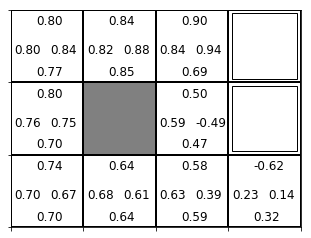

In [5]:
from matplotlib import pyplot as plt

pos = {"U": (-0.15, -0.3), "D": (-0.15, 0.4), "L": (-0.45, 0.1), "R": (0.05, 0.1)}

def show_action_value_function(Q, plot_all = True):
    fig = env.render(show = False, show_state = False, show_reward = False)            
    for s in env.states():
        if plot_all:
            for i, a in enumerate(env.actions(s)):
                fig.axes[0].annotate("{0:.2f}".format(Q[(*s, a)]), (s[1] + pos[a][0], s[0] + pos[a][1]), size = 12)
        else: 
            lst = [Q[(*s, a)] for a in env.actions(s)]
            if lst:
                fig.axes[0].annotate("{0:.3f}".format(max(lst)), (s[1] - 0.1, s[0] + 0.1), size = 12)
    plt.show()

show_action_value_function(Q, plot_all= True)

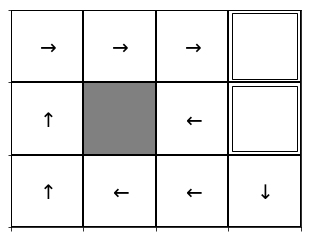

In [6]:
def show_action_value_policy(Q):
    fig = env.render(show = False, show_state = False, show_reward = False)
    action_map = {"U": "↑", "D": "↓", "L": "←", "R": "→"}
    for s in env.states():
        lst = [Q[(*s, a)] for a in env.actions(s)]
        if lst:
            fig.axes[0].annotate(action_map[env.actions(s)[np.argmax(lst)]], (s[1] - 0.1, s[0] + 0.1), size = 20)
    plt.show()
    
show_action_value_policy(Q)